In [ ]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.8-py3-none-any.whl size=1439795 sha256=6810707480a980d96c72281e611f5abbfd36414e1a41ec289634bf7dc2cf45ff
  Stored in directory: c:\users\swathy r\appdata\local\pip\cache\wheels\05\94\dc\81042da9bced43ff430bc02043d213d9e4b210b584c39e31c1
Successfully built jax


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.
mysql-connector-python 8.0.30 requires protobuf<=3.20.1,>=3.11.0, but you have protobuf 4.22.1 which is incompatible.


In [ ]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import os
import glob
import shutil
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19, MobileNet, InceptionV3, EfficientNetB6

In [ ]:
# Read the data folders paths
train_path = "Car_Brand_Logos/Train"
test_path = "Car_Brand_Logos/Test"

In [ ]:
train_gen = ImageDataGenerator().flow_from_directory(train_path,
                                              target_size=(128, 128), class_mode='categorical')
test_gen = ImageDataGenerator().flow_from_directory(test_path,
                                              target_size=(128, 128), class_mode='categorical')

Found 2513 images belonging to 8 classes.
Found 272 images belonging to 8 classes.


In [ ]:
print(test_gen.image_shape)

(128, 128, 3)


In [ ]:
print(train_gen.image_shape)

(128, 128, 3)


In [ ]:
weights = model.layers[0].get_weights()[0]

# Print the shape of the filters
print(weights.shape)

(3, 3, 3, 32)


In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

# Define the input shape
input_shape = (128, 128, 3)

# Create an instance of the InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer with 1024 units and ReLU activation
x = Dense(1024, activation='relu')(x)

# Add a softmax layer for classification
predictions = Dense(8, activation='softmax')(x)

# Combine the base model and new layers
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create ImageDataGenerators for training and validation data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size and number of epochs
batch_size = 32
epochs = 10

# Set the paths for the train and test data directories
train_dir = 'Car_Brand_Logos/Train'
test_dir = 'Car_Brand_Logos/Test'

# Use the flow_from_directory method to load the data from the directories
train_generator = ImageDataGenerator().flow_from_directory(train_dir, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')
test_generator = ImageDataGenerator().flow_from_directory(test_dir, target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

# Train the model
model_fit = model.fit(train_generator, epochs=epochs, validation_data=test_generator)


Found 2513 images belonging to 8 classes.
Found 272 images belonging to 8 classes.
Epoch 1/10
79/79 [==============================] - 148s 2s/step - loss: 2.1079 - accuracy: 0.2002 - val_loss: 1.8696 - val_accuracy: 0.3566
Epoch 2/10
79/79 [==============================] - 152s 2s/step - loss: 1.3934 - accuracy: 0.5320 - val_loss: 27.9363 - val_accuracy: 0.3787
Epoch 3/10
79/79 [==============================] - 251s 3s/step - loss: 0.8920 - accuracy: 0.7294 - val_loss: 15.0705 - val_accuracy: 0.4118
Epoch 4/10
79/79 [==============================] - 124s 2s/step - loss: 0.6556 - accuracy: 0.8006 - val_loss: 1.8014 - val_accuracy: 0.5147
Epoch 5/10
79/79 [==============================] - 126s 2s/step - loss: 0.6112 - accuracy: 0.8158 - val_loss: 1.1734 - val_accuracy: 0.7096
Epoch 6/10
79/79 [==============================] - 126s 2s/step - loss: 0.4732 - accuracy: 0.8639 - val_loss: 1.2699 - val_accuracy: 0.7132
Epoch 7/10
79/79 [==============================] - 126s 2s/step - lo

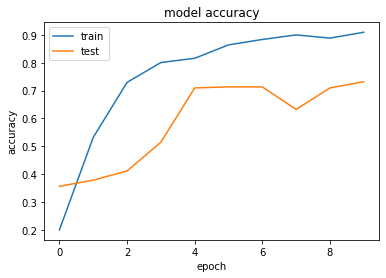

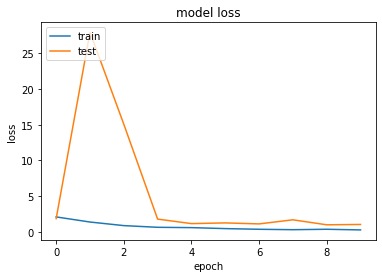

In [ ]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_generator)

9/9 [==============================] - 4s 389ms/step


In [ ]:
import tensorflow as tf

9/9 [==============================] - 4s 379ms/step


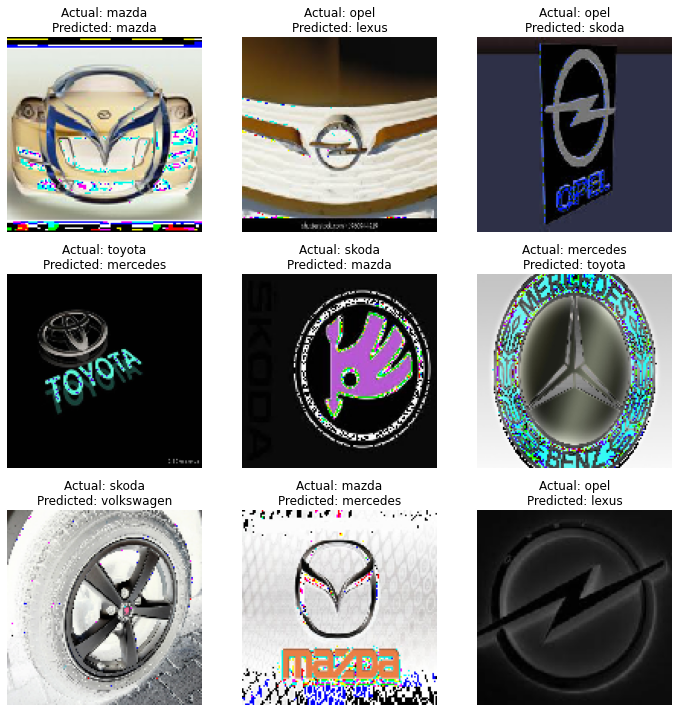

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate predicted labels for the test set
pred_labels = model.predict(test_generator)
pred_classes = np.argmax(pred_labels, axis=1)

# Get actual labels for the test set
actual_classes = test_generator.classes

# Get class names from the ImageDataGenerator
class_names = list(train_generator.class_indices.keys())

# Display images with predicted and actual labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat):
    # Load image and convert from normalized to unnormalized form
    img, actual_label = test_generator[i]
    img = img[0]*255

    # Get predicted label for the image
    pred_label = class_names[pred_classes[i]]

    # Display image with predicted and actual labels
    ax.imshow(img.astype('uint8'))
    ax.set_title(f"Actual: {class_names[actual_label.argmax()]}\nPredicted: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()
